In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

In [23]:
kittila_url = 'https://raw.githubusercontent.com/Mini-project-Team-Theta/team_theta/refs/heads/main/final/kittila_df.csv'
df = pd.read_csv(kittila_url)
df.head()

,Observation station,Year,Month,Day,Date,Snow depth mean [cm],Average temperature [°C],cloud_code,Global radiation mean [W/m2]
0,KittilÃ¤ Pakatti,2014,1,1,2014-01-01,50.0,-5.2,8.0,-0.5
1,KittilÃ¤ Pakatti,2014,1,2,2014-01-02,50.0,-3.2,8.0,-0.2
2,KittilÃ¤ Pakatti,2014,1,3,2014-01-03,49.0,-0.9,8.0,0.1
3,KittilÃ¤ Pakatti,2014,1,4,2014-01-04,49.0,-2.3,8.0,-0.1
4,KittilÃ¤ Pakatti,2014,1,5,2014-01-05,48.0,-0.9,8.0,-0.2


In [24]:
df["Date"] = pd.to_datetime(df["Date"])
df['day_of_year'] = df['Date'].dt.dayofyear
df.drop(columns=["Observation station"], inplace=True)

In [25]:
df["Average temperature [°C]"] = df["Average temperature [°C]"].interpolate()
df["Global radiation mean [W/m2]"] = df["Global radiation mean [W/m2]"].interpolate()
df.loc[df['cloud_code'].isnull(),'cloud_code'] = 9
df.loc[df['Snow depth mean [cm]'].isnull(),'Snow depth mean [cm]'] = 0

In [26]:
X = df[["Average temperature [°C]", "Global radiation mean [W/m2]", "day_of_year", "cloud_code"]]
y = df["Snow depth mean [cm]"]

In [27]:
loaded_model = joblib.load('isosyote_snow_depth_predictor.pkl')

In [28]:
predictions = loaded_model.predict(X)

In [29]:
predictions

array([59.05858173, 56.48516454, 53.54884608, ...,  0.91626294,
        3.8482023 ,  3.15357451], shape=(4018,))

In [30]:
y2024 = predictions[-365::10]
x2024 = X["day_of_year"][-365::10]
y2004 = predictions[:365:10]
x2004 = X["day_of_year"][:365:10]

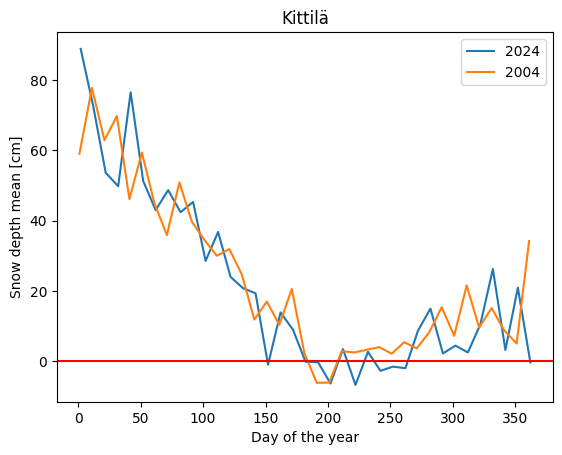

In [31]:
plt.plot(x2024, y2024, label= "2024")
plt.plot(x2004, y2004, label= "2004")
plt.title('Kittilä')
plt.legend()
plt.axhline(y=0, color="red")
plt.ylabel('Snow depth mean [cm]')
plt.xlabel('Day of the year')
plt.show()